# Linear Regression

use Scikit-learn to perform a basic,
unvalidated linear regression on the sample of 10 dogs. We pull in this data
using Pandas, convert it into NumPy arrays, perform linear regression using
Scikit-learn, and use plotly to display it in a chart.

m = [1.93939394]
b = [4.73333333]


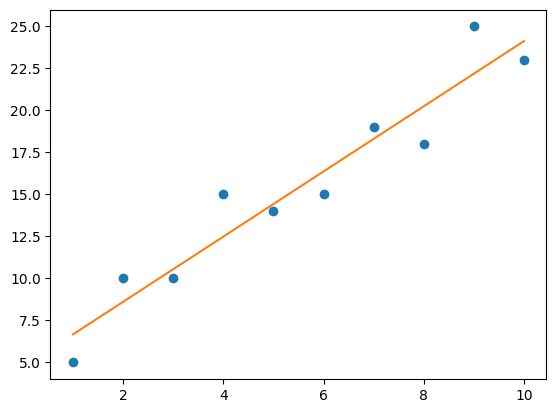

In [3]:
#Using Scikit-learn to do a linear regression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")
# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]
# Extract output column (all rows, last column)
Y = df.values[:, -1]
# Fit a line to the points
fit = LinearRegression().fit(X, Y)
# m = 1.7867224, b = -16.51923513
m = fit.coef_.flatten()
b = fit.intercept_.flatten()
print("m = {0}".format(m))
print("b = {0}".format(b))
# show in chart
plt.plot(X, Y, 'o') # scatterplot
plt.plot(X, m*X+b) # line
plt.show()